In [1]:
import numpy as np

**Funciones Lambda**
* Las funciones lambda en Python son funciones anónimas, es decir, funciones que no tienen nombre. Se utilizan principalmente para definir funciones cortas y simples sobre la marcha. La sintaxis básica es:

* 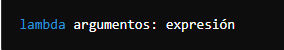

* La función lambda puede tener cualquier número de argumentos, pero solo una expresión. Aquí hay algunos ejemplos básicos:

In [2]:
#Una funcion lambda que suma dos numeros
suma = lambda x, y: x + y
print(suma(2,3))

5


**Uso de Lambda con Diferentes Estructuras de Datos**

* **Listas** Puedes usar funciones lambda con funciones integradas como:
 
* **map()**
* **filter()**
* **sorted()** 

Para operar en las listas definidas

**Uso de map()**

* map(): Aplica una función a todos los elementos de una lista.

In [8]:
numeros = np.arange(1,5)
cuadrados = list(map(lambda x: x ** 2,numeros))
print(cuadrados)

[1, 4, 9, 16]


**filter():** Filtra los elementos de una lista que cumplen con una condición.

In [7]:
numeros = list(np.arange(1,7))

pares = list(filter(lambda x: x % 2 == 0, numeros))
print(pares)

[2, 4, 6]


**sorted():** Ordena los elementos de una lista, y puede tomar una función lambda como clave de ordenación.

In [28]:
puntos = [(1, 2), (3, 1), (5, 0), (2, 4)]
grouped_data = sorted(puntos,key=lambda x: x[1])
print(grouped_data)

[(5, 0), (3, 1), (1, 2), (2, 4)]


**Diccionarios**

* Puedes usar funciones lambda con diccionarios para tareas como ordenar por claves o valores.

In [44]:
from operator import itemgetter
estudiantes = {'Ana': 8, 'Pedro': 7, 'Luis': 9}

#ordenar por nombre
sorted_students = dict(sorted(estudiantes.items(),key=itemgetter(0)))
print(f"Usando Itemgetter: {sorted_students}")

sorted_students_lambda = dict(sorted(estudiantes.items(), key=lambda item: item[0]))
print(f"Usando lambda: {sorted_students_lambda}")

#Ordenar por calificacion de menor a mayor
sorted_values = dict(sorted(estudiantes.items(),key=lambda item: item[1]))
print(sorted_values)

#Ordenar por calificacion de mayor a menor
sorted_values = dict(sorted(estudiantes.items(),key=lambda item: item[1],reverse=True))
print(sorted_values)


Usando Itemgetter: {'Ana': 8, 'Luis': 9, 'Pedro': 7}
Usando lambda: {'Ana': 8, 'Luis': 9, 'Pedro': 7}
{'Pedro': 7, 'Ana': 8, 'Luis': 9}
{'Luis': 9, 'Ana': 8, 'Pedro': 7}


**Ejercicios para Practicar**
* Multiplicar todos los elementos de una lista por 3 utilizando map() y una función lambda.

In [48]:
lista = np.arange(1,5)
multiplicados = list(map(lambda x: x * 3,lista))
print(multiplicados)

[3, 6, 9, 12]


* Filtrar los números negativos de una lista utilizando filter() y una función lambda.

In [49]:
numeros = [-5, -2, 0, 1, 4, -1]

negativos = list(filter(lambda x: x < 0,numeros))
print(negativos)


[-5, -2, -1]


* Ordenar una lista de diccionarios por un valor específico utilizando sorted() y una función lambda.

In [58]:
from operator import itemgetter
productos = [{'nombre': 'manzana', 'precio': 10}, {'nombre': 'banana', 'precio': 8}, {'nombre': 'naranja', 'precio': 12}]

sorted_price = sorted(productos,key=lambda x: x['precio'])
print(sorted_price)

sorted_price_item = sorted(productos,key=itemgetter('precio'))
print(sorted_price_item)

[{'nombre': 'banana', 'precio': 8}, {'nombre': 'manzana', 'precio': 10}, {'nombre': 'naranja', 'precio': 12}]
[{'nombre': 'banana', 'precio': 8}, {'nombre': 'manzana', 'precio': 10}, {'nombre': 'naranja', 'precio': 12}]


**Estructura de Datos Compleja**

* Supongamos que tienes una lista de tuplas que representa datos de ventas en diferentes tiendas, donde cada tupla contiene una sub-tupla con el nombre de la tienda y la ciudad, y el valor es la cantidad vendida.

In [59]:
ventas = [(('Tienda A', 'Ciudad X'), 100),
          (('Tienda B', 'Ciudad Y'), 200),
          (('Tienda A', 'Ciudad X'), 150),
          (('Tienda C', 'Ciudad Z'), 300),
          (('Tienda B', 'Ciudad Y'), 50)]


**Ejemplos de Operaciones con Funciones Lambda**
1. Sumar las Ventas por Tienda
Queremos sumar las ventas para cada tienda independientemente de la ciudad.

In [63]:
from collections import defaultdict


#Crear un diccionario para almacenar las ventas por tienda
ventas_por_tienda = defaultdict(int)

for ((tienda, ciudad), venta) in ventas:
    ventas_por_tienda[tienda] += venta

    
resultado = list(ventas_por_tienda.items())
print(resultado)

[('Tienda A', 250), ('Tienda B', 250), ('Tienda C', 300)]


In [81]:
ventas

[(('Tienda A', 'Ciudad X'), 100),
 (('Tienda B', 'Ciudad Y'), 200),
 (('Tienda A', 'Ciudad X'), 150),
 (('Tienda C', 'Ciudad Z'), 300),
 (('Tienda B', 'Ciudad Y'), 50)]

In [145]:
from itertools import groupby

sorted_store = sorted(ventas,key=lambda x: x[0][0])

#agrupar los datos por tienda y sumar los valores
resultados = []
for tienda, price in groupby(sorted_store,key=lambda x: x[0][0]):
    #Explicacion de como funcion
    # print(tienda,price)
    # for item in price:
    #     print(item[1])

#Mas simplificado
    suma = sum(item[1] for item in price)
    resultados.append((tienda,suma))

print(resultados)

[('Tienda A', 250), ('Tienda B', 250), ('Tienda C', 300)]


2. Filtrar Ventas por Ciudad Específica
Queremos filtrar todas las ventas que se realizaron en la "Ciudad X".

In [146]:
ventas

[(('Tienda A', 'Ciudad X'), 100),
 (('Tienda B', 'Ciudad Y'), 200),
 (('Tienda A', 'Ciudad X'), 150),
 (('Tienda C', 'Ciudad Z'), 300),
 (('Tienda B', 'Ciudad Y'), 50)]

In [171]:
ventas[0][0][1]

'Ciudad X'

In [206]:
from itertools import groupby

sales_sorted = sorted(ventas,key=lambda x: x[0][0])

list_stores = []
for key, sales in groupby(sales_sorted,key=lambda x: x[0][1]):
    if key not in lista:
        values = tuple(value[1] for value in sales)
        
        list_stores.append((key,values))
        

print("Se filtro unicamente por la tienda Ciudad X")
city_store_X = list(filter(lambda x: x[0] == "Ciudad X",list_stores))
print(city_store_X)

Se filtro unicamente por la tienda Ciudad X
[('Ciudad X', (100, 150))]


In [174]:
ciudad_x = list(filter(lambda x: x[0][1]=='Ciudad X',ventas))
print(ciudad_x)

[(('Tienda A', 'Ciudad X'), 100), (('Tienda A', 'Ciudad X'), 150)]
